# Exercise 4
Let us consider the one dimensional boundary value problem for the functions $u_1$ and $u_2$:

\begin{gather*}
u_{1,2}^{\prime \prime}(x) + u_{1,2}(x) = 0 \qquad \text{for} \; x \in \Omega := (0,\pi),\\
u_{1}(0) = -1 \quad \text{and} \quad u_{1}(\pi) = 1,\\
u_{2}(0) = 0 \quad \text{and} \quad u_{2}(\pi) = 1
\end{gather*}

To discretize $\Omega$ we choose the step size $h := \frac{\pi}{N + 1}$ to $N := 2 ^ p -1 $ and $p  \in \mathbb{N}$. Then we define the discretized version of $\Omega$ with $\Omega_h := \left\{ h i \; : \; i = 0, \dots, N \right\}$.\\
We now want to determine the influence of the boundary values to the numerical solution.

### Part a)
Now we want to create a function that takes $N$, $u_h(0)$ and $u_h(\pi)$ as an input parameter and returns $x_h$, the matrix $L_h \in \mathbb{R}^{N \times N} $ and the right hand side $f_h \in \mathbb{R}^N$ that belong to $\Omega_{h}$ as before.

In [88]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# compute the boundary problem
def getbvp( p, alpha , beta ):
    
    bv1 = alpha #the first boundary value 
    bv2 = beta  #the second boundary value
    N = 2**p - 1 #meshgrid number N
    h = np.pi/(N+1) #step size h
    
    #Construct L_h matrix
    D_2 = np.zeros((N,N)) #generate a n*n zero matrix
    e1 = -1   # index of the first element equal to 1 in the first row
    e2 = -N   # index of the element equal to -2 in the first row
    e3 = -N+1 # index of the second element equal to 1 in the first row
    for i in range(N):
        D_2[i,e1+i]=1  #element equal to 1 in i row
        D_2[i,e2+i]=-2 #element equal to -2 in i row
        D_2[i,e3+i]=1  #element equal to 1 in i row
    D_2 = D_2/(h**2)
    I = np.identity(N) #identity matrix I
    L = D_2 + I
    
    #Construct f   f=[-alpha/h^2,0,...,0,-beta/h^2]^T
    f = np.zeros(N)
    f[0]  =  -bv1/(h**2)
    f[-1] =  -bv2/(h**2)
    
    #Construct x
    x = [(i+1)*h for i in range(N)]
    
    return x, L, f

### Part b)

Compute the solution by solving the linear system and plot the solution for each $p=1,\dots, 8$.

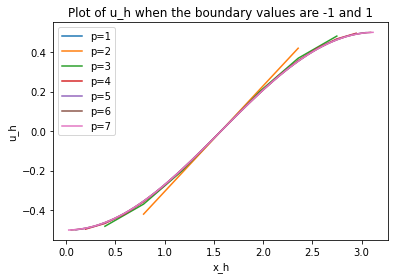

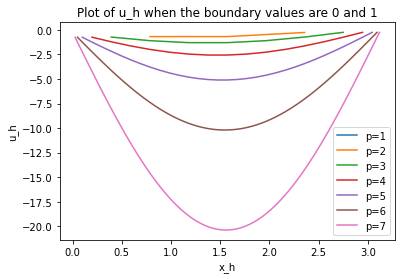

In [89]:
for alpha,beta in [(-1,1),(0,1)]:
    plt.figure()
    for p in range(1,8):
        # Your code
        x,L,f = getbvp(p,alpha,beta) #call function getbvp
        y = np.linalg.solve(L,f) #use linalg.solve to solve the linear system Lu=f. u_h is returned
        plt.plot(x,y,label="{}{}".format("p=",p)) #plot
    plt.title("{}{}{}{}".format("Plot of u_h when the boundary values are ",alpha," and ",beta)) #add the title
    plt.legend() #add the legend
    plt.xlabel('x_h') 
    plt.ylabel('u_h') 